# Dimensionality Reduction

# Exercises

## 1.
Dimensionality reduction speeds up training, saves space (compression), and can help us visualize and gain insights about the data.

## 2.
The curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional spaces arise in high-dimensional spaces. Randomly sampled high-dimensional vectors tend to be very sparse, which increases the risk of overfitting and makes it harder to identify patterns in the data without having astronomical amount of it (which is often intractable).

## 3.
It is almost always impossible to perfectly recover the original data, because information often gets lost during dimensionality reduction. Moreover, while algorithms like PCA provide an inverse transform that can reconstruct a dataset similar to the original input, other algorithms such as t-SNE do not.

## 4.
PCA can get rid of useless dimensions, so it can definitely reduce the dimensionality of nonlinear datasets. However, if there are no such useless dimensions, dimensionality reduction with PCA will lose too much information.

## 5.
Depends on the explained variance ratio of each axis. One could plot the explained variance as a function of the number of dimensions in order to get a rough idea of the dataset's intrinsic dimensionality.

## 6.

**Regular PCA**: This should be the default approach as long as the dataset fits in memory.

**Incremental PCA**: Great for dealing with large datasets and applying PCA online, although it is slower than regular PCA.

**Randomized PCA**: Can be much faster than regular PCA when $d$ is much smaller than $n$, but it only finds an approximation of the first $d$ principal components. It is a great tool when we want to considerably reduce dimensionality on a dataset that fits in memory.

**Kernel PCA**: Is mostly useful for nonlinear datasets.

## 7.
One way it to measure the reconstruction error of the new representation of the data, although not all dimensionality reduction algorithms provide a reverse transformation. When dimensionality reduction is used as a preprocessing step before feeding the data to another Machine Learning algorithm, we can monitor the performance of the algorithm, expecting a similar performance (or even better) if the dimensionality reduction did not loose too much information.

## 8.
It can make sense! One common approach is to use PCA to get rid of a large number of dimensions, than apply another much slower algorithm, such as LLE. This two-step approach will likely yield the same result of using only LLE, but in a fraction of the time.

## 9.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.values.astype(np.uint8)
y = y.values.astype(np.uint8)

X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [2]:
from sklearn.ensemble import RandomForestClassifier
import time

rf_clf = RandomForestClassifier(n_estimators=50)
t0 = time.time()
rf_clf.fit(X_train, y_train)
t1 = time.time()
print(f"Training on the full dataset took {t1 - t0:.2f}s")
rf_clf.score(X_test, y_test)

Training on the full dataset took 16.33s


0.9665

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [4]:
rf_clf2 = RandomForestClassifier(n_estimators=50)
t0 = time.time()
rf_clf2.fit(X_train_reduced, y_train)
t1 = time.time()
print(f"Training on the reduced dataset took {t1 - t0:.2f}s")
rf_clf2.score(X_test_reduced, y_test)

Training on the reduced dataset took 43.04s


0.9412

As we can see, dimensionality reduction does not always to faster training time: it depends on the dataset, the model and the training algorithm. We can also observe that the performance dropped slightly, given the information loss introduced by dimensionality reduction.

## 10.

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# We will use only the a small poriton of the data to save some (a lot actually) time
idx = np.random.choice(X_train.shape[0], size=5000)
X, y = X_train[idx], y_train[idx]

X_tsne = TSNE(n_jobs=-1).fit_transform(X)

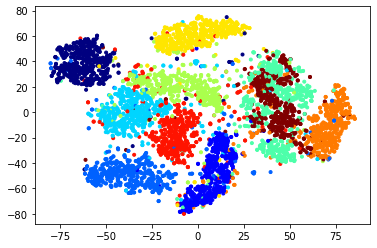

In [6]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='.', cmap='jet');

In [7]:
X_pca = PCA(n_components=2).fit_transform(X)

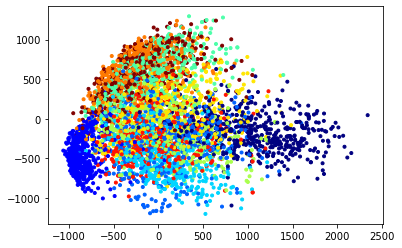

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, marker='.', cmap='jet');

In [9]:
from sklearn.manifold import LocallyLinearEmbedding

X_lle = LocallyLinearEmbedding(n_jobs=-1).fit_transform(X)

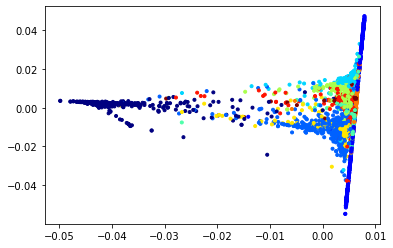

In [10]:
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, marker='.', cmap='jet');

In [11]:
from sklearn.manifold import MDS

X_mds = MDS().fit_transform(X)

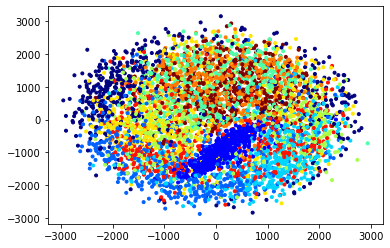

In [12]:
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, marker='.', cmap='jet');

In [13]:
from sklearn.manifold import Isomap

X_isomap = Isomap().fit_transform(X)

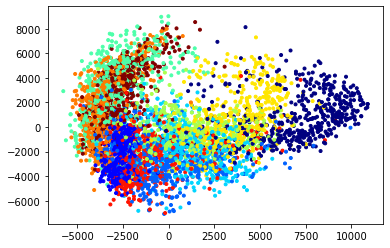

In [14]:
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, marker='.', cmap='jet');